
# Project: European Soccer Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


> In this project, I aim to investigate an extensive dataset from Kaggle that contains data for soccer matches, players, and teams from several European countries from 2008 to 2016. Particularly, I am interested in finding out how a player's rating is associated with his height, weight and age. 

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy.stats import ttest_ind
from matplotlib.pyplot import figure
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [53]:

df_pattributes = pd.read_csv(r'/Users/harryx113/nano/Project 2/Player_Attributes.csv', index_col='id')
df_player = pd.read_csv(r'/Users/harryx113/nano/Project 2/Player.csv', index_col='id')

In [3]:
df_pattributes.head()

,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
id,,,,,,,,,,,,,,,,,,,,,
1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,44.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [4]:
df_pattributes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183978 entries, 1 to 183978
Data columns (total 41 columns):
player_fifa_api_id     183978 non-null int64
player_api_id          183978 non-null int64
date                   183978 non-null object
overall_rating         183142 non-null float64
potential              183142 non-null float64
preferred_foot         183142 non-null object
attacking_work_rate    180748 non-null object
defensive_work_rate    183142 non-null object
crossing               183142 non-null float64
finishing              183142 non-null float64
heading_accuracy       183142 non-null float64
short_passing          183142 non-null float64
volleys                181265 non-null float64
dribbling              183142 non-null float64
curve                  181265 non-null float64
free_kick_accuracy     183142 non-null float64
long_passing           183142 non-null float64
ball_control           183142 non-null float64
acceleration           183142 non-null float64
spri

In [5]:
# Now, I would like to take a look at the Player dataframe
df_player.head()

,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
id,,,,,,
1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [6]:
df_player.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11060 entries, 1 to 11075
Data columns (total 6 columns):
player_api_id         11060 non-null int64
player_name           11060 non-null object
player_fifa_api_id    11060 non-null int64
birthday              11060 non-null object
height                11060 non-null float64
weight                11060 non-null int64
dtypes: float64(1), int64(3), object(2)
memory usage: 604.8+ KB


### Data Cleaning: Slicing and Merging

In [7]:
# Since I'm only interested in the overall ratings of the players, I'm filtering out all the irrelavent columns
# I'm saving all the columns I need in a new dataframe: df_pratings
df_pratings = df_pattributes[['player_fifa_api_id','player_api_id','date','overall_rating']]
df_pratings.head()

,player_fifa_api_id,player_api_id,date,overall_rating
id,,,,
1,218353,505942,2016-02-18 00:00:00,67.0
2,218353,505942,2015-11-19 00:00:00,67.0
3,218353,505942,2015-09-21 00:00:00,62.0
4,218353,505942,2015-03-20 00:00:00,61.0
5,218353,505942,2007-02-22 00:00:00,61.0


In [8]:
# Check the overall ratings' cutoffs
df_pratings['overall_rating'].describe()

count    183142.000000
mean         68.600015
std           7.041139
min          33.000000
25%          64.000000
50%          69.000000
75%          73.000000
max          94.000000
Name: overall_rating, dtype: float64

In [9]:
# Now merge player and player ratings into one dataset
df_playerall = pd.merge(df_player, df_pratings, on='player_api_id')
df_playerall.head()

,player_api_id,player_name,player_fifa_api_id_x,birthday,height,weight,player_fifa_api_id_y,date,overall_rating
0,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,218353,2016-02-18 00:00:00,67.0
1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,218353,2015-11-19 00:00:00,67.0
2,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,218353,2015-09-21 00:00:00,62.0
3,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,218353,2015-03-20 00:00:00,61.0
4,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,218353,2007-02-22 00:00:00,61.0


In [10]:
# First, I'd like to drop player_fifa_api_id x and y, because they are of no use
df_playerall.drop(columns=['player_fifa_api_id_x', 'player_fifa_api_id_y'], inplace=True)
df_playerall.head()

,player_api_id,player_name,birthday,height,weight,date,overall_rating
0,505942,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187,2016-02-18 00:00:00,67.0
1,505942,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187,2015-11-19 00:00:00,67.0
2,505942,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187,2015-09-21 00:00:00,62.0
3,505942,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187,2015-03-20 00:00:00,61.0
4,505942,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187,2007-02-22 00:00:00,61.0


In [11]:
# Notice that each person can have multiple entries, so let's make sure they are not duplicates
df_playerall[df_playerall.duplicated() == True]
# There is one, so let's look more closely
df_playerall[df_playerall['player_api_id'] == 32968]
# It's worth noticing that 1. a player can have multiple entries and 2. some rows have no ratings



,player_api_id,player_name,birthday,height,weight,date,overall_rating
84691,32968,John Potter,1979-12-15 00:00:00,185.42,183,2011-08-30 00:00:00,64.0
84692,32968,John Potter,1979-12-15 00:00:00,185.42,183,2011-02-22 00:00:00,69.0
84693,32968,John Potter,1979-12-15 00:00:00,185.42,183,2010-08-30 00:00:00,70.0
84694,32968,John Potter,1979-12-15 00:00:00,185.42,183,2009-08-30 00:00:00,75.0
84695,32968,John Potter,1979-12-15 00:00:00,185.42,183,2009-02-22 00:00:00,66.0
84696,32968,John Potter,1979-12-15 00:00:00,185.42,183,2008-08-30 00:00:00,70.0
84697,32968,John Potter,1979-12-15 00:00:00,185.42,183,2007-08-30 00:00:00,67.0
84698,32968,John Potter,1979-12-15 00:00:00,185.42,183,2007-02-22 00:00:00,74.0
84699,32968,John Potter,1979-12-15 00:00:00,185.42,183,2015-01-09 00:00:00,63.0
84700,32968,John Potter,1979-12-15 00:00:00,185.42,183,2014-09-18 00:00:00,64.0


In [12]:
# Let's drop all the rows with no ratings and drop the duplicated row
df_playerall.dropna(axis=0, inplace=True)
df_playerall.drop_duplicates()
# Check if they are dropped
df_playerall.duplicated().sum()
df_playerall['overall_rating'].isna().sum()

0

In [13]:
# Now I have to consider whether including multiple entries for a single player might affect my result
# And I decide to keep only the most recent entry for each player, because otherwise the height and weight data would be 
# contaminated.
df_playerall['date'] = pd.to_datetime(df_playerall['date'])
df_playerall['birthday'] = pd.to_datetime(df_playerall['birthday'])
df_playerall['age'] = df_playerall['date'].dt.year - df_playerall['birthday'].dt.year

# To keep the most recent entry, I sorted by the age column and dropped the earlier entries
df_playerall.sort_values(by=['age'], ascending=False)
df_playerall.drop_duplicates(subset='player_api_id', inplace=True)

In [14]:
# Check if the duplicated entries are dropped
df_playerall.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 11060 entries, 0 to 183968
Data columns (total 8 columns):
player_api_id     11060 non-null int64
player_name       11060 non-null object
birthday          11060 non-null datetime64[ns]
height            11060 non-null float64
weight            11060 non-null int64
date              11060 non-null datetime64[ns]
overall_rating    11060 non-null float64
age               11060 non-null int64
dtypes: datetime64[ns](2), float64(2), int64(3), object(1)
memory usage: 777.7+ KB


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1: How are weight and overall rating correlated?

In [15]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
df_playerall['overall_rating'].describe()

count    11060.000000
mean        67.961935
std          6.316694
min         42.000000
25%         64.000000
50%         68.000000
75%         72.000000
max         94.000000
Name: overall_rating, dtype: float64

In [16]:
# Find out the average weight for player with top 25% rating and bottom 25% rating
top = df_playerall[df_playerall['overall_rating'] > 73]
bottom = df_playerall[df_playerall['overall_rating'] < 64]
top.mean() - bottom.mean()

player_api_id    -81307.338078
height                0.345968
weight                2.970006
overall_rating       17.119880
age                   2.594656
dtype: float64

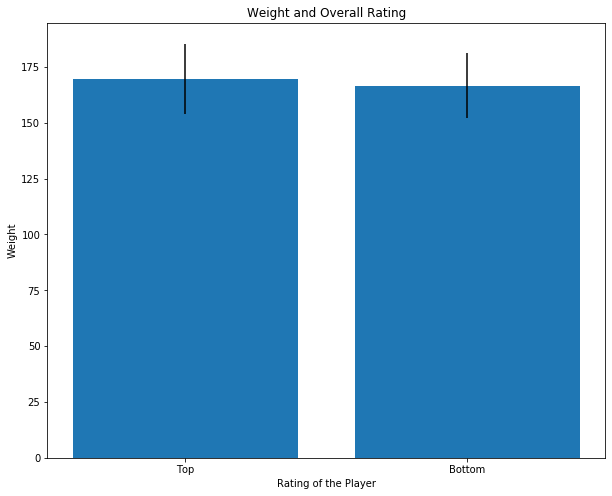

In [45]:
figure(figsize=(10, 8))
top_weight_mean = top['weight'].mean()
bottom_weight_mean = bottom['weight'].mean()
top_weight_std = top['weight'].std()
bottom_weight_std = bottom['weight'].std()
plt.bar(['Top', 'Bottom'], [top_weight_mean, bottom_weight_mean], yerr=[top_weight_std, bottom_weight_std])
plt.xlabel('Rating of the Player')
plt.ylabel('Weight')
plt.title('Weight and Overall Rating')
plt.show()

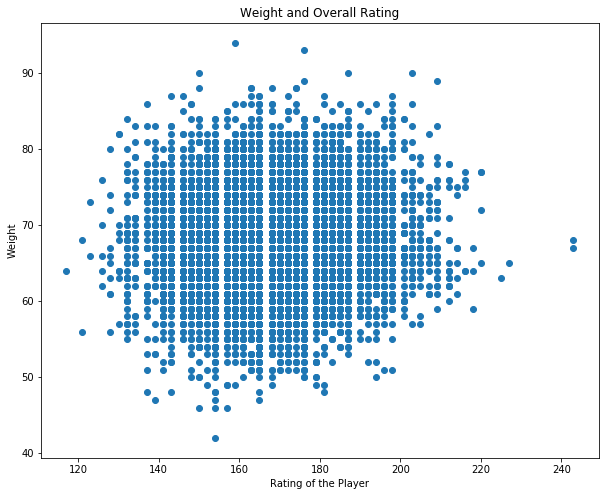

In [46]:
figure(figsize=(10, 8))
plt.scatter(df_playerall['weight'], df_playerall['overall_rating'])
plt.xlabel('Rating of the Player')
plt.ylabel('Weight')
plt.title('Weight and Overall Rating')
plt.show()

### Research Question 2: How are height and overall rating correlated?

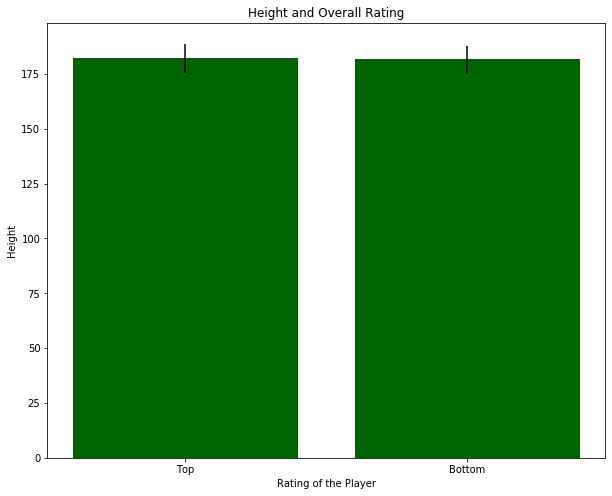

In [51]:
figure(figsize=(10, 8))
top_height_mean = top['height'].mean()
bottom_height_mean = bottom['height'].mean()
top_height_std = top['height'].std()
bottom_height_std = bottom['height'].std()
plt.bar(['Top', 'Bottom'], [top_height_mean, bottom_height_mean], yerr=[top_height_std, bottom_height_std], color='darkgreen')
plt.xlabel('Rating of the Player')
plt.ylabel('Height')
plt.title('Height and Overall Rating')
plt.show()

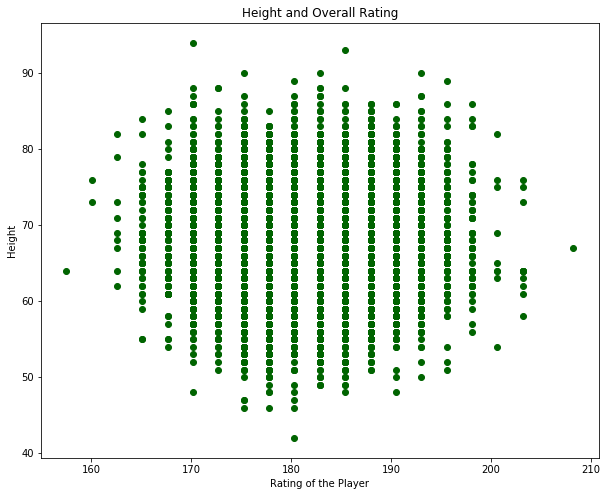

In [48]:
figure(figsize=(10, 8))
plt.scatter(df_playerall['height'], df_playerall['overall_rating'], color='darkgreen')
plt.xlabel('Rating of the Player')
plt.ylabel('Height')
plt.title('Height and Overall Rating')
plt.show()

### Research Question 3: How are age and overall rating correlated?

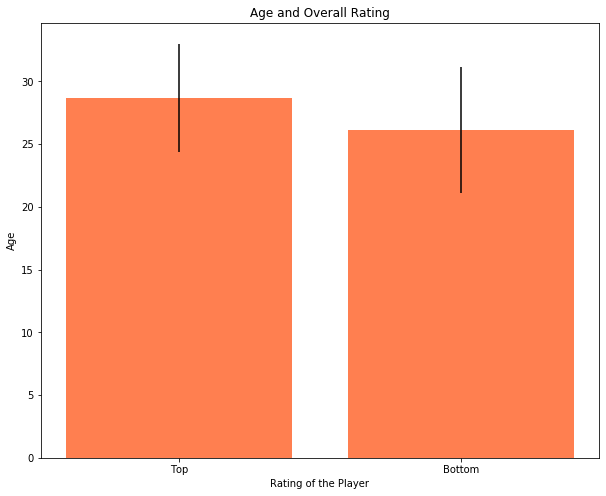

In [49]:
figure(figsize=(10, 8))
top_age_mean = top['age'].mean()
bottom_age_mean = bottom['age'].mean()
top_age_std = top['age'].std()
bottom_age_std = bottom['age'].std()
plt.bar(['Top', 'Bottom'], [top_age_mean, bottom_age_mean], yerr=[top_age_std, bottom_age_std], color='coral')
plt.xlabel('Rating of the Player')
plt.ylabel('Age')
plt.title('Age and Overall Rating')
plt.show()

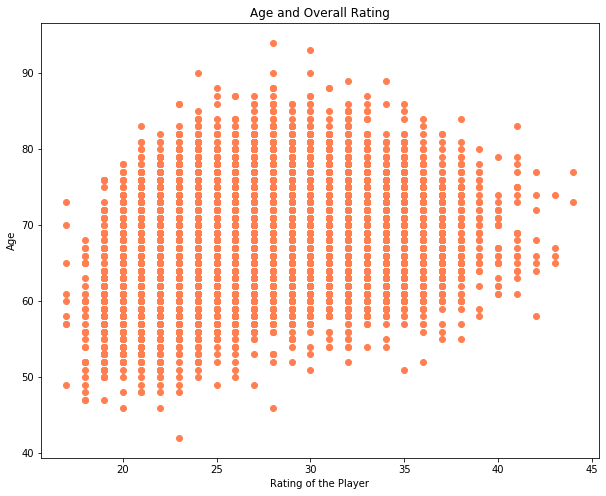

In [50]:
figure(figsize=(10, 8))
plt.scatter(df_playerall['age'], df_playerall['overall_rating'], color='coral')
plt.xlabel('Rating of the Player')
plt.ylabel('Age')
plt.title('Age and Overall Rating')
plt.show()

<a id='conclusions'></a>
## Conclusions

> The height, weight and age of a player all don't seem to have a strong correlation with the player's overall rating, although the more highly rated players seem to be a little taller, heavier and older.
>
> The limitation is that no statistical analysis was conducted to understand the exact correlations. The dataset itself also has some limitations. For example, each player has multiple entries at different time, but the height and weight of the player remain the same, so no time-series correlation can be studied.
